# Decoding Strategies: Greedy Search, Top-K Sampling, Nucleus Sampling (Top-p), and Beam Search

This exercise demonstrates various decoding strategies for generating text with GPT-2: Greedy Search, Top-K Sampling, Nucleus Sampling, and Beam Search.

Each strategy has its own approach to generating the next token in the sequence and affects the diversity and quality of the generated text.


In this cell, we load the pre-trained GPT-2 model and its corresponding tokenizer. These will be used to encode the input text and generate new text with different decoding strategies. We also define a maximum sequence length for the generated text.


In [2]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained GPT-2 model and tokenizer
model_name = "gpt2"
max_length = 30
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

In [3]:
model.eval()
tokenizer.pad_token = tokenizer.eos_token

In [4]:
#DEFINE YOUR PROMPT
prompt = "After college graduation, I want to"

In [5]:
input_ids = tokenizer.encode(prompt, return_tensors="pt")

This cell implements **Greedy Search**, which generates text by selecting the token with the highest probability at each time step. It is a deterministic approach, often leading to less diverse or repetitive text.

In [6]:
print("\n--- Greedy Search ---")
output = model.generate(input_ids, max_length=max_length)
output = tokenizer.decode(output[0], skip_special_tokens=True)
output

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.



--- Greedy Search ---


'After college graduation, I want to be a writer. I want to be a writer. I want to be a writer. I want to be a'

This cell implements **Top-K Sampling**, where at each step, the model samples from the top `k` tokens with the highest probabilities. The `temperature` parameter controls the randomness: higher temperatures increase randomness by flattening the probability distribution. Top-K Sampling encourages diversity while keeping the generated text sensible.

In [7]:
print("\n--- Top-K Sampling ---")
top_k = 50
temperature = 1
output = model.generate(
    input_ids,
    max_length=max_length,
    do_sample=True,
    top_k=top_k,
    temperature=temperature
)
output = tokenizer.decode(output[0], skip_special_tokens=True)
output

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



--- Top-K Sampling ---


'After college graduation, I want to return to the West from East Coast. Here are my dream programs.\n\nMy School\n\nI graduated four'

In this cell, we use **Nucleus Sampling (Top-p Sampling)**, where the model samples from the smallest possible set of tokens whose cumulative probability exceeds `p` (here, 0.9). This method dynamically adjusts the token pool size based on the probability distribution, promoting more diversity while still maintaining coherent results.


In [8]:
print("\n--- Nucleus Sampling ---")

top_p = 0.9
temperature = 1
output = model.generate(
    input_ids,
    max_length=max_length,
    do_sample=True,
    top_p=top_p,
    temperature=temperature
)

output = tokenizer.decode(output[0], skip_special_tokens=True)
output


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



--- Nucleus Sampling ---


'After college graduation, I want to find the best possible job and the right opportunities to continue my education," she said. "I would like to do'

This cell demonstrates **Beam Search**, a more sophisticated decoding strategy. Instead of choosing one token at each step, the model considers multiple candidate sequences (beams) and keeps the top `beam_size` sequences at each step. This ensures a better balance between exploration and the likelihood of the generated text. However, it can be computationally expensive.

In [9]:

print("\n--- Beam Search ---")

beam_size = 5
output = model.generate(
    input_ids,
    max_length=max_length,
    num_beams=beam_size,
    early_stopping=True
)

output = tokenizer.decode(output[0], skip_special_tokens=True)
output

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



--- Beam Search ---


'After college graduation, I want to be able to do what I want to do. I want to be able to do what I want to do.'

## Temperature Visualization
In this exercise you can see how temperature changes the output of the model.

In this cell, we initialize the GPT-2 model for text generation. We define `top_k` (the number of tokens considered at each step) and set the **temperature** parameter, which controls the randomness of the model's predictions. A higher temperature increases randomness by softening the probability distribution.


**Change the temperature to visualize the differences in the output distribution**

In [10]:
import torch
from torch.nn import functional as F
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained GPT-2 model and tokenizer
model_name = "gpt2"
max_length = 30
model = GPT2LMHeadModel.from_pretrained(model_name)
top_k = 10
temperature = 1.8 ## Change this value to a value >= 0.
max_length = 100

Here, we provide a text prompt and generate text using the GPT-2 model with the defined temperature and top-k sampling.


In [11]:
prompt = "After college graduation, I want to"
input_ids = tokenizer.encode(prompt, return_tensors="pt")


generation_output = model.generate(
    input_ids,
    max_length=max_length,
    do_sample=True,
    top_k=top_k,
    temperature=temperature,
    return_dict_in_generate=True, output_scores=True
)

logits_tensor = torch.stack(generation_output.scores, dim=1)  # Shape: [1, sequence_length, vocab_size]


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In this cell, we compute the token probabilities for each step in the generated sequence by applying the softmax function to the logits. We then extract the top-k tokens and their probabilities, printing them for a single time step in the generated sequence.


In [12]:
# Decode tokens and get related probabilities
for step_logits in logits_tensor[0]:  # Iterate over each timestep logits
    # Apply softmax to compute probabilities
    probs = F.softmax(step_logits, dim=-1)

    # Get the top tokens and their probabilities
    topk_probs, topk_indices = torch.topk(probs, k=10)  # Adjust 'k' as needed (e.g., top 10 tokens)

    # Decode token IDs into readable tokens
    topk_tokens = [tokenizer.decode([token_id]) for token_id in topk_indices]

    # Print tokens and their probabilities
    print("\nTokens and Probabilities:")
    for token, prob in zip(topk_tokens, topk_probs):
        print(f"Token: {token}, Probability: {prob.item()}")
    break



Tokens and Probabilities:
Token:  be, Probability: 0.27151817083358765
Token:  make, Probability: 0.09109441190958023
Token:  do, Probability: 0.083014577627182
Token:  help, Probability: 0.08281910419464111
Token:  know, Probability: 0.08245342969894409
Token:  go, Probability: 0.07971687614917755
Token:  get, Probability: 0.07851032167673111
Token:  become, Probability: 0.07830871641635895
Token:  see, Probability: 0.07662437111139297
Token:  take, Probability: 0.07593996077775955


This cell decodes the generated sequence of token IDs back into human-readable text and displays the complete output generated by the GPT-2 model.


In [13]:
output = tokenizer.decode(generation_output.sequences[0], skip_special_tokens=True)
output

"After college graduation, I want to see what my kids will learn. If we get married at 16 and start a family, and then we live out our dreams for a lifetime. That's what I would do. I'm happy to have a child with me when I'm older. I've also read some of your articles and heard from other women's writers that have found it difficult to accept that you've changed the rules. How are you responding now? And how would it be different if you"

In this cell, we visualize the top-k token probabilities from the previous step using a bar chart. The tokens are displayed on the x-axis, and their corresponding probabilities are shown on the y-axis, allowing us to see how likely each token is based on the model's predictions.


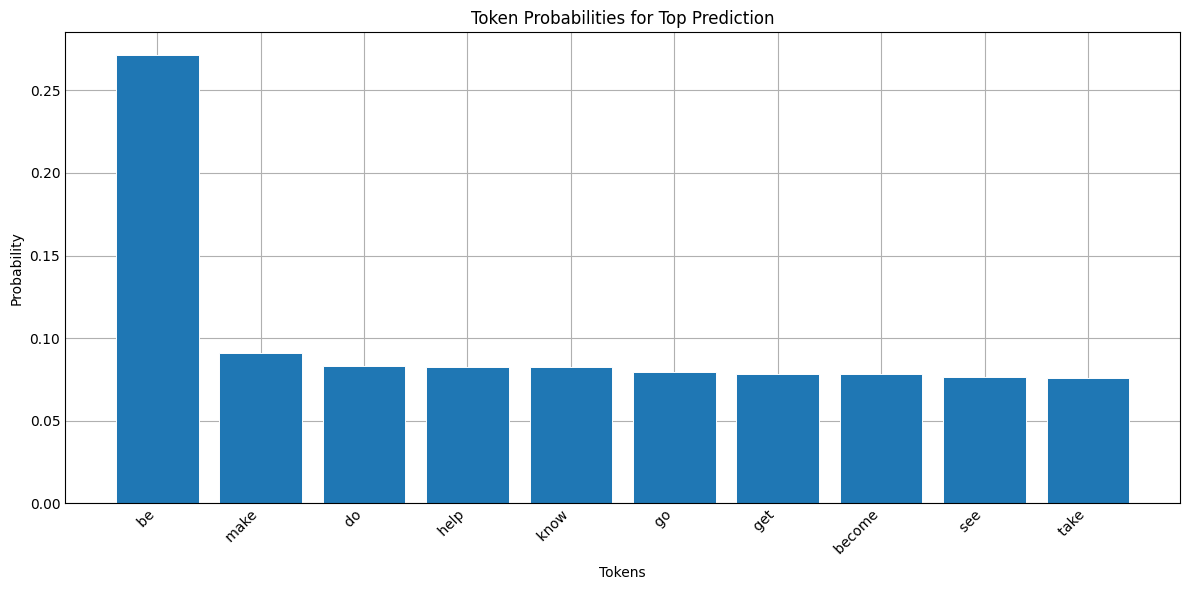

In [14]:
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')

# Make data
x = topk_tokens
y = topk_probs

# Plot
fig, ax = plt.subplots(figsize=(12, 6))  # Set width to 12 and height to 6
ax.bar(x, y, width=0.8, edgecolor="white", linewidth=0.7)

# Customize appearance
ax.set_title("Token Probabilities for Top Prediction")
ax.set_ylabel("Probability")
ax.set_xlabel("Tokens")
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and adjust x-axis token labels
plt.tight_layout()  # Adjust layout for better spacing

plt.show()